In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib; matplotlib.rcParams['figure.figsize'] = (8,3)

In [2]:
import numpy as np

In [3]:
# Reload all packages - make debugging easier
%load_ext autoreload
%autoreload 2

---

In [4]:
from simple import SimpleMatrixFactorization

---

In [5]:
import sys 
sys.path.append('..')

from movieLensAnalyzer import MovieLensAnalyzer 
movieLensAnalyzer = MovieLensAnalyzer()
R = movieLensAnalyzer.trainRatingMatrix # take some matrix... just check if it trains and if so how quickly

In [6]:
model = SimpleMatrixFactorization(ratings_matrix=R, hidden_dim=20, batch_size=200)

In [7]:
def score():
    # For now, just some mse of random users.
    mses = []
    for user_index in [0,11,20,30]:
        print('User', user_index)
        idx = np.where(R[user_index] > 0)
        rhats = np.mean(model.sample_user_ratings(user_index), axis=0)[idx]
        r = R[user_index][idx]
        print(np.round(rhats[:10]))
        print(r[:10])
        mses.append(np.mean(np.square(rhats - r)))
    return mses

score()

User 0
[-0.  0. -0. -0. -0. -0.  1. -1. -0.  0.]
[ 5.  3.  4.  3.  4.  1.  5.  3.  2.  5.]
User 11
[ 0.  0. -0.  0.  0. -0.  0. -1.  1. -0.]
[ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.]
User 20
[ 0. -0.  1. -0. -0.  0.  1.  0.  0.  0.]
[ 5.  2.  5.  5.  4.  4.  3.  4.  5.  5.]
User 30
[-0.  1.  0.  0.  0.  1. -0.  0. -0.  0.]
[ 5.  2.  4.  4.  5.  4.  5.  4.  5.  3.]


[14.640326942298998,
 20.778551456086788,
 9.1172469879036377,
 16.927110648242749]

In [8]:
mask = R>0

CPU times: user 23.7 s, sys: 2.99 s, total: 26.7 s
Wall time: 17.8 s


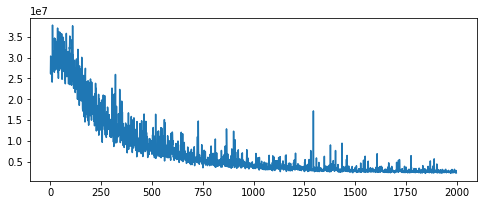

In [9]:
%time losses = model.train(mask=mask, n_iter=2000, verbose=True)
plt.plot(losses)

In [10]:
score()

User 0
[ 5.  3.  3.  4.  4.  4.  4.  4.  4.  5.]
[ 5.  3.  4.  3.  4.  1.  5.  3.  2.  5.]
User 11
[ 4.  4.  4.  4.  5.  5.  4.  4.  3.  4.]
[ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.]
User 20
[ 4.  3.  4.  4.  4.  3.  4.  3.  4.  4.]
[ 5.  2.  5.  5.  4.  4.  3.  4.  5.  5.]
User 30
[ 4.  4.  4.  4.  4.  3.  4.  4.  3.  4.]
[ 5.  2.  4.  4.  5.  4.  5.  4.  5.  3.]


[0.75156200205830548,
 0.88951193837212872,
 0.95836387034772252,
 0.79390935785570393]